In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
mnist = tf.keras.datasets.mnist

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
print(
    "Training Data Shape is {} ,  Its Type Is {} ,\nTest Data Shape is {} , Its Type is {} ".format(
        train_images.shape , type(train_images) , test_images.shape , type(test_images)
    )
)

Training Data Shape is (60000, 28, 28) ,  Its Type Is <class 'numpy.ndarray'> ,
Test Data Shape is (10000, 28, 28) , Its Type is <class 'numpy.ndarray'> 


In [10]:
def display_img(mnist_index):
   
    image = mnist_index
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

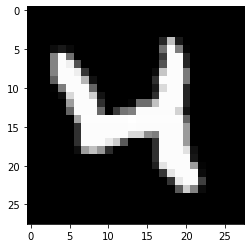

In [11]:
display_img(train_images[20])

In [12]:
train_labels[20]

4

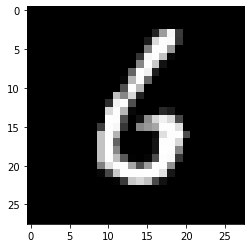

In [13]:
display_img(test_images[50])

In [16]:
test_labels[50]

6

In [17]:
def imaged_grid(img , row , col ):
 
    x , y = img.shape

    assert x % row == 0, "{} rows is not evenly divisble by {}".format(x, row)
    assert y % col == 0, "{} cols is not evenly divisble by {}".format(y, col)
    
    return (img.reshape ( x //row, row, -1, col)
               .swapaxes(1,2)
               .reshape(-1, row, col))
    

In [18]:
print(imaged_grid(test_images[20] , 4 , 4 ).shape)
imaged_grid(test_images[20] , 4 , 4 )

(49, 4, 4)


array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0, 

In [19]:
def get_centroid(img):

    feature_vector = []
 
    for grid in imaged_grid(img , 4 , 4 ) :
        
        Xc = 0 
        Yc = 0 
        sum = 0
    
        for index, x in np.ndenumerate(grid):
          sum+= x 
          Xc += x * index[0]
          Yc += x * index[1]
        
        if sum != 0 :
            feature_vector.append( Xc/ sum )
            feature_vector.append(Yc/ sum )
        else :
             feature_vector.append(0)
             feature_vector.append(0)
        
    
    return np.array(feature_vector)

In [20]:
print("Feature Extraction From Training Data")
train_features = [get_centroid(img)  for img in train_images  ]
print("Done")

Feature Extraction From Training Data
Done


In [21]:
train_features = np.array(train_features)

In [22]:
train_features.shape

(60000, 98)

In [23]:
train_features[:2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 3.        , 3.        , 2.76048818, 1.68115942,
        2.47797798, 1.57357357, 2.10562347, 1.20586797, 1.6419467 ,
        1.20973349, 0.        , 0.        , 0.        , 0.        ,
        0.        , 3.        , 0.71785335, 1.88204038, 1.16192254,
        0.79608026, 0.28759124, 0.57664234, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 3.        , 1.26427489, 1.78473977,
        2.48275862, 0.67619849, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.7398374 , 2.20092915, 1.58961424,
        1.63204748, 1.03030303, 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.78882682, 2.15

In [24]:
print("Feature Extraction From Test Data")
test_features = [get_centroid(img)  for img in test_images  ]
print("Done")

Feature Extraction From Test Data
Done


In [25]:
test_features = np.array(test_features)

In [26]:
test_features.shape

(10000, 98)

In [27]:
test_features[:2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 3.        , 2.68773234, 3.        , 0.93349754,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.27549467, 2.56012177, 0.38220551, 1.66478697, 0.70998495,
        1.52132464, 1.10528423, 1.75820657, 1.49210308, 0.26267664,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.54498715, 1.79520137, 0.34645669, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.36649215, 2.65026178, 1.08368794,
        0.42765957, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [35]:
def KNN(train_features, test_features, train_labels):
    knn = KNeighborsClassifier(4)
    knn.fit(train_features, train_labels)  # fit train data
    prediction = knn.predict(test_features)  # test data
    return prediction

In [29]:
Knn_prediction = KNN(train_features, test_features , train_labels )

In [30]:
print("Accuracy =", accuracy_score(test_labels, Knn_prediction) * 100, "%")

Accuracy = 91.71000000000001 %
